In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as mp
import seaborn as sns

In [2]:
box=pd.read_csv("E:\\robi_data 1\\boxes.csv")
problem=pd.read_csv("E:\\robi_data 1\\problem 1.csv")
purchase=pd.read_csv("E:\\robi_data 1\\purchase.csv")


## Loading data

In [3]:
box

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1,Premium,Home Delivery - CoD,0.0,2.7,9.96
1,2,Premium,Home Delivery - CoD,0.0,2.3,11.96
2,3,Premium,Home Delivery - CoD,0.0,2.4,11.96
3,4,Premium,Home Delivery - CoD,0.0,2.5,11.96
4,5,Premium,Home Delivery - CoD,0.0,2.6,11.96
...,...,...,...,...,...,...
285,286,Standard,Home Delivery - Digital Payment,0.0,4.0,15.96
286,287,Standard,Home Delivery - Digital Payment,0.0,2.9,15.96
287,288,Standard,Home Delivery - Digital Payment,0.0,3.6,15.96
288,289,Standard,Home Delivery - Digital Payment,0.0,4.7,15.96


In [4]:
purchase

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT
0,1/2/2019,2CED678A247,12.0,1.0
1,1/2/2019,2BF58D91BA1,12.0,1.0
2,1/2/2019,2C15B86534E,99.0,1.0
3,1/2/2019,2C32D9A859A,6.0,1.0
4,1/2/2019,2C7A55404D1,4.0,1.0
...,...,...,...,...
2455859,28/10/2018,2BD992B5538,12.0,1.0
2455860,28/10/2018,2C97CD72233,17.0,1.0
2455861,28/10/2018,2C91C61D372,40.0,1.0
2455862,28/10/2018,2CD70CFC4E3,51.0,1.0


In [5]:
problem

,MAGIC_KEY
0,28D5BB06356
1,293BEAB4E98
2,2962EE8065C
3,2957BE29EA9
4,28E351A0745
...,...
58684,28FB7C09776
58685,28E0E3B69BF
58686,28D343103A7
58687,290B1D6D5CB


## merging the data with left join by "BOX_ID"

In [6]:
merge_total_data=pd.merge(purchase,box,how="left",on="BOX_ID")
merge_total_data["MILK"]=merge_total_data["MILK"].astype(float)


In [7]:
merge_total_data

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1/2/2019,2CED678A247,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
1,1/2/2019,2BF58D91BA1,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
2,1/2/2019,2C15B86534E,99.0,1.0,Premium,Delivery from Collection Point,0.0,3.3,13.96
3,1/2/2019,2C32D9A859A,6.0,1.0,Premium,Home Delivery - CoD,0.0,2.7,11.96
4,1/2/2019,2C7A55404D1,4.0,1.0,Premium,Home Delivery - CoD,0.0,2.5,11.96
...,...,...,...,...,...,...,...,...,...
2455859,28/10/2018,2BD992B5538,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
2455860,28/10/2018,2C97CD72233,17.0,1.0,Premium,Home Delivery - CoD,10.0,1.8,12.98
2455861,28/10/2018,2C91C61D372,40.0,1.0,Premium,Home Delivery - CoD,12.0,1.8,19.98
2455862,28/10/2018,2CD70CFC4E3,51.0,1.0,Premium,Home Delivery - CoD,18.0,2.9,23.98


In [8]:
test=pd.merge(problem,merge_total_data,how="inner",on="MAGIC_KEY")
test

,MAGIC_KEY,PURCHASE_DATE,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,28D5BB06356,26/2/2019,248.0,1.0,Standard,Delivery from Collection Point,0.0,2.9,13.96
1,28D5BB06356,27/1/2019,255.0,1.0,Standard,Delivery from Collection Point,0.0,3.6,15.96
2,28D5BB06356,23/12/2018,255.0,1.0,Standard,Delivery from Collection Point,0.0,3.6,15.96
3,293BEAB4E98,8/2/2019,272.0,1.0,Standard,Delivery from Collection Point,16.0,2.2,19.98
4,293BEAB4E98,8/1/2019,272.0,1.0,Standard,Delivery from Collection Point,16.0,2.2,19.98
...,...,...,...,...,...,...,...,...,...
218597,28D343103A7,12/1/2019,217.0,1.0,Standard,Home Delivery - CoD,10.0,2.5,17.98
218598,290B1D6D5CB,1/2/2019,213.0,1.0,Standard,Home Delivery - CoD,0.0,3.6,15.96
218599,290B1D6D5CB,30/12/2018,248.0,1.0,Standard,Delivery from Collection Point,0.0,2.9,13.96
218600,28FF193CB94,15/2/2019,245.0,1.0,Standard,Delivery from Collection Point,0.0,2.4,13.96


In [9]:
train=pd.merge(merge_total_data,problem,how="left",on="MAGIC_KEY",indicator=True)
anti_join_result = train[train['_merge'] == 'left_only']

# Drop the indicator column
merge_total_data = anti_join_result.drop(columns='_merge')
merge_total_data

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1/2/2019,2CED678A247,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
1,1/2/2019,2BF58D91BA1,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
2,1/2/2019,2C15B86534E,99.0,1.0,Premium,Delivery from Collection Point,0.0,3.3,13.96
3,1/2/2019,2C32D9A859A,6.0,1.0,Premium,Home Delivery - CoD,0.0,2.7,11.96
4,1/2/2019,2C7A55404D1,4.0,1.0,Premium,Home Delivery - CoD,0.0,2.5,11.96
...,...,...,...,...,...,...,...,...,...
2455859,28/10/2018,2BD992B5538,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
2455860,28/10/2018,2C97CD72233,17.0,1.0,Premium,Home Delivery - CoD,10.0,1.8,12.98
2455861,28/10/2018,2C91C61D372,40.0,1.0,Premium,Home Delivery - CoD,12.0,1.8,19.98
2455862,28/10/2018,2CD70CFC4E3,51.0,1.0,Premium,Home Delivery - CoD,18.0,2.9,23.98


# Creating condition if Milk&Meat=Yes . Otherwise NO 

Now we will create a column "purchase" based on MILK & MEAT. If the person with magic key buy both meat and milk then we will consider it as Yes (Y). Otherwise NO(N) 

In [10]:
def purchase(row):
    
    if row["MILK"] > 0 and row["MEAT"] > 0:
        return "Y"
    
    else:
        return "N"
    

In [11]:
merge_total_data["purchase"]=merge_total_data.apply(purchase, axis=1)

In [12]:
merge_total_data

,PURCHASE_DATE,MAGIC_KEY,BOX_ID,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,purchase
0,1/2/2019,2CED678A247,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98,Y
1,1/2/2019,2BF58D91BA1,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98,Y
2,1/2/2019,2C15B86534E,99.0,1.0,Premium,Delivery from Collection Point,0.0,3.3,13.96,N
3,1/2/2019,2C32D9A859A,6.0,1.0,Premium,Home Delivery - CoD,0.0,2.7,11.96,N
4,1/2/2019,2C7A55404D1,4.0,1.0,Premium,Home Delivery - CoD,0.0,2.5,11.96,N
...,...,...,...,...,...,...,...,...,...,...
2455859,28/10/2018,2BD992B5538,12.0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98,Y
2455860,28/10/2018,2C97CD72233,17.0,1.0,Premium,Home Delivery - CoD,10.0,1.8,12.98,Y
2455861,28/10/2018,2C91C61D372,40.0,1.0,Premium,Home Delivery - CoD,12.0,1.8,19.98,Y
2455862,28/10/2018,2CD70CFC4E3,51.0,1.0,Premium,Home Delivery - CoD,18.0,2.9,23.98,Y


In [13]:
merge_total_data["purchase"].unique()

array(['Y', 'N'], dtype=object)

## Droping data

we can drop data as some simultanous rows are missing 

In [14]:
merge_total=merge_total_data.drop_duplicates()

In [15]:
merge_total=merge_total_data.dropna()

In [16]:
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold,GridSearchCV,cross_val_predict,RandomizedSearchCV
from sklearn.feature_selection import SequentialFeatureSelector,VarianceThreshold
import missingno as miss


## Creating target and relevent variables

In [17]:


data=merge_total.drop(["purchase","MAGIC_KEY","BOX_ID","PURCHASE_DATE"],axis=1)
target=merge_total[["purchase"]]
 


<Axes: >

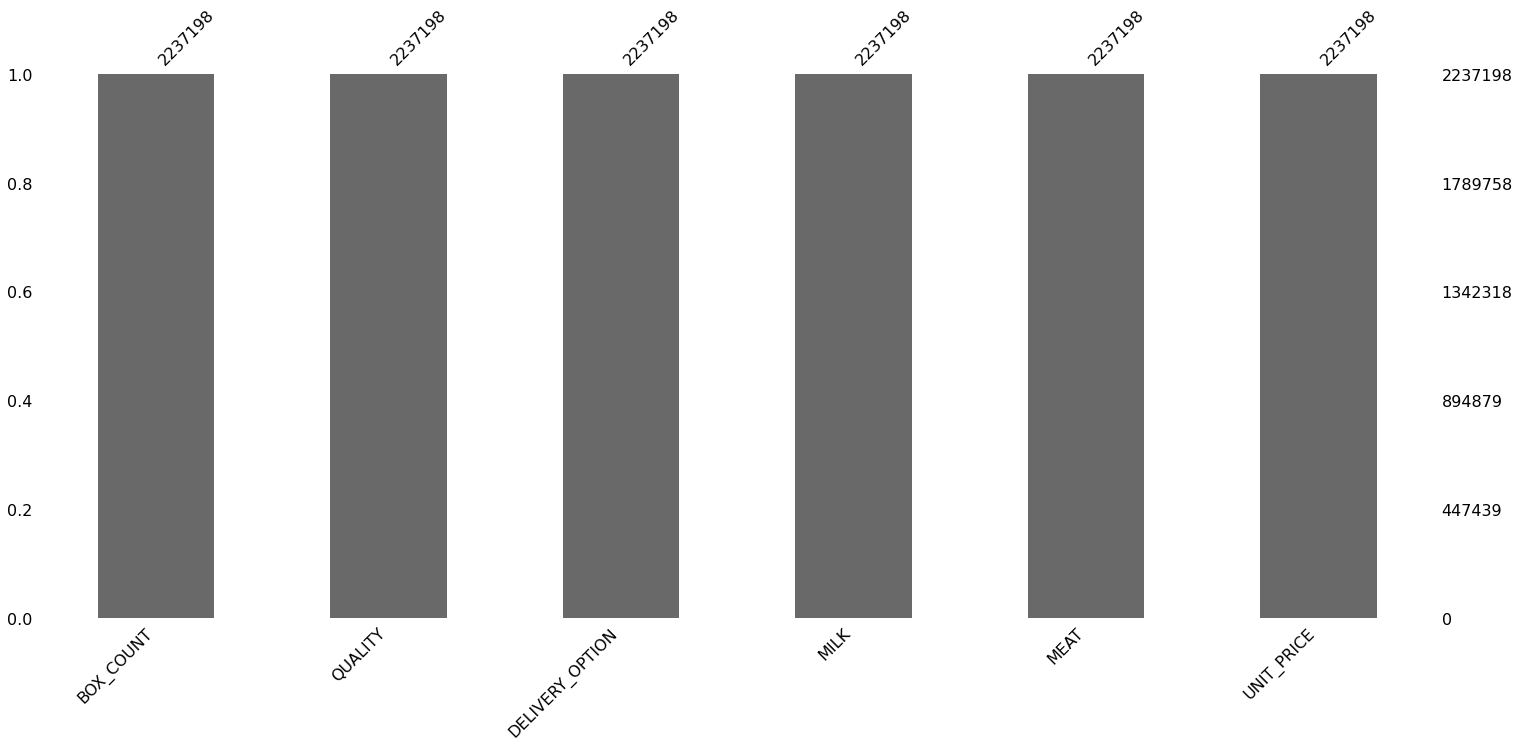

In [18]:
miss.bar(data)

In [19]:
data


,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
1,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
2,1.0,Premium,Delivery from Collection Point,0.0,3.3,13.96
3,1.0,Premium,Home Delivery - CoD,0.0,2.7,11.96
4,1.0,Premium,Home Delivery - CoD,0.0,2.5,11.96
...,...,...,...,...,...,...
2455859,1.0,Premium,Home Delivery - CoD,8.0,1.5,12.98
2455860,1.0,Premium,Home Delivery - CoD,10.0,1.8,12.98
2455861,1.0,Premium,Home Delivery - CoD,12.0,1.8,19.98
2455862,1.0,Premium,Home Delivery - CoD,18.0,2.9,23.98


## Model selection
we will use logistic model as it is a binary classification models

In [53]:
model=RandomForestClassifier(n_jobs=-1)

In [54]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
ps={
   'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
    
}

In [56]:
scale=SklearnTransformerWrapper(transformer=StandardScaler())
encode=SklearnTransformerWrapper(transformer=OrdinalEncoder(),variables=["QUALITY","DELIVERY_OPTION"])
encode2=SklearnTransformerWrapper(transformer=OrdinalEncoder())


In [57]:

data_scale=scale.fit_transform(data)
data_encode=encode.fit_transform(data_scale)
data_target=encode2.fit_transform(target)


In [58]:
data_encode

,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,-0.025709,0.0,1.0,-0.053037,-0.561256,-1.153268
1,-0.025709,0.0,1.0,-0.053037,-0.561256,-1.153268
2,-0.025709,0.0,0.0,-1.453681,1.316493,-0.916826
3,-0.025709,0.0,1.0,-1.453681,0.690577,-1.399361
4,-0.025709,0.0,1.0,-1.453681,0.481938,-1.399361
...,...,...,...,...,...,...
2455859,-0.025709,0.0,1.0,-0.053037,-0.561256,-1.153268
2455860,-0.025709,0.0,1.0,0.297124,-0.248298,-1.153268
2455861,-0.025709,0.0,1.0,0.647286,-0.248298,0.535605
2455862,-0.025709,0.0,1.0,1.697769,0.899216,1.500676


In [59]:
search=RandomizedSearchCV(model,param_distributions=ps,cv=StratifiedKFold(n_splits=5),n_iter=50,n_jobs=-1)

In [60]:
fit=search.fit(data_encode,data_target)


C:\Users\Lenovo\anaconda3\envs\Rprog\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
130 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\envs\Rprog\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\envs\Rprog\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Lenovo\anaconda3\envs\Rprog\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
 

In [61]:
model_new=fit.best_estimator_
fit.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [62]:
cross_val=cross_val_score(model_new,data_encode,data_target,cv=StratifiedKFold(n_splits=5),scoring="accuracy")
cross_val

C:\Users\Lenovo\anaconda3\envs\Rprog\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\envs\Rprog\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\envs\Rprog\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\anaconda3\envs\Rprog\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

array([1., 1., 1., 1., 1.])

In [63]:
y_pred_cv=cross_val_predict(model_new,data_encode,data_target,cv=StratifiedKFold(n_splits=5),n_jobs=-1)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
data_target
conf_matrix = confusion_matrix(data_target, y_pred_cv)

In [66]:
conf_matrix

array([[ 861909,       0],
       [      0, 1375289]], dtype=int64)

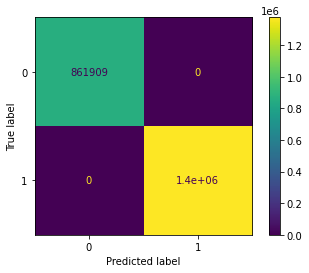

In [67]:
plot=ConfusionMatrixDisplay(conf_matrix)
plot.plot()

In [68]:
test1=test.drop_duplicates()
test2=test.dropna()
test3=test.drop(["MAGIC_KEY","PURCHASE_DATE","BOX_ID"],axis=1)

In [69]:
test_scale=scale.fit_transform(test3)
test_encode=encode.fit_transform(test_scale)
test_encode

,BOX_COUNT,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE
0,-0.025816,1.0,0.0,-1.038683,0.588608,-0.797731
1,-0.025816,1.0,0.0,-1.038683,1.208454,-0.086727
2,-0.025816,1.0,0.0,-1.038683,1.208454,-0.086727
3,-0.025816,1.0,0.0,1.562467,-0.031237,1.342391
4,-0.025816,1.0,0.0,1.562467,-0.031237,1.342391
...,...,...,...,...,...,...
218597,-0.025816,1.0,1.0,0.587036,0.234411,0.631387
218598,-0.025816,1.0,1.0,-1.038683,1.208454,-0.086727
218599,-0.025816,1.0,0.0,-1.038683,0.588608,-0.797731
218600,-0.025816,1.0,0.0,-1.038683,0.145861,-0.797731


In [70]:
predict=fit.predict(test_encode)
predict2=pd.DataFrame(predict)
predict2

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
218597,1.0
218598,1.0
218599,1.0
218600,1.0


In [71]:
test2["MAGIC_KEY"]

0         28D5BB06356
1         28D5BB06356
2         28D5BB06356
3         293BEAB4E98
4         293BEAB4E98
             ...     
218597    28D343103A7
218598    290B1D6D5CB
218599    290B1D6D5CB
218600    28FF193CB94
218601    28FF193CB94
Name: MAGIC_KEY, Length: 218602, dtype: object

In [72]:
submisson=pd.DataFrame({
    'MAGIC_KEY':test2["MAGIC_KEY"],'PURCHASE':predict[0]
})

In [73]:
submisson=submisson.drop_duplicates()

In [74]:
submisson

,MAGIC_KEY,PURCHASE
0,28D5BB06356,1.0
3,293BEAB4E98,1.0
7,2962EE8065C,1.0
9,2957BE29EA9,1.0
11,28E351A0745,1.0
...,...,...
218590,28FB7C09776,1.0
218594,28E0E3B69BF,1.0
218596,28D343103A7,1.0
218598,290B1D6D5CB,1.0


In [75]:
submisson['PURCHASE'] = submisson['PURCHASE'].replace({0: 'Y', 1: 'N'})

In [76]:
submisson

,MAGIC_KEY,PURCHASE
0,28D5BB06356,N
3,293BEAB4E98,N
7,2962EE8065C,N
9,2957BE29EA9,N
11,28E351A0745,N
...,...,...
218590,28FB7C09776,N
218594,28E0E3B69BF,N
218596,28D343103A7,N
218598,290B1D6D5CB,N


In [77]:
submisson.to_csv('submission2.csv', index=None)